# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Taking Data and Data Analysis

In [54]:
df1 = pd.read_csv("Banking_CreditCardAttrition_new.csv")
df1.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,253,196,196,262,0,7,9,12,7,7
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,242,323,222,238,0,1,6,11,7,8
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,330,967,213,182,0,1,5,5,4,5
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,166,184,285,215,0,4,2,5,2,7
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,149,192,88,279,0,1,7,9,5,6
5,713061558,0,44.0,M,2,Graduate,Married,$40K - $60K,Blue,36,...,279,480,55,95,0,1,12,8,1,2
6,810347208,0,51.0,M,4,Unknown,Married,$120K +,Gold,46,...,189,453,228,202,0,8,10,8,2,3
7,818906208,0,32.0,M,0,High School,Unknown,$60K - $80K,Silver,27,...,330,531,329,198,0,4,17,10,2,3
8,710930508,0,37.0,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,66,599,195,246,0,9,2,9,2,2
9,719661558,0,48.0,M,2,Graduate,Single,$80K - $120K,Blue,36,...,340,489,212,169,0,7,10,7,4,4


In [55]:
df1.shape

(10127, 27)

In [56]:
df1.isnull().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                14
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 4
Total_Revolving_Bal          0
Trans_Amt_Oct12              0
Trans_Amt_Nov12              0
Trans_Amt_Dec12              0
Trans_Amt_Jan13              0
Trans_Amt_Feb13              0
Trans_Amt_Mar13              0
Trans_Count_Oct12            0
Trans_Count_Nov12            0
Trans_Count_Dec12            0
Trans_Count_Jan13            0
Trans_Count_Feb13            0
Trans_Count_Mar13            0
dtype: int64

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10113 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10123 non-null  float64
 14  Total_

In [58]:
df1.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
count,1.012700e+04,10127.000000,10113.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10123.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.326412,2.346203,35.928409,3.812580,2.341167,2.455317,9404.071817,1194.058951,...,861.019749,672.763405,609.424015,605.489582,12.713341,12.307100,13.104967,10.209835,7.354597,9.168856
std,3.690378e+07,0.367235,8.022353,1.298908,7.986416,1.554408,1.010622,1.106225,12283.599656,1073.368778,...,696.774222,592.881189,498.088308,489.841852,4.881924,5.540818,5.682993,3.892556,3.981386,4.477821
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,398.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,...,419.000000,309.000000,275.000000,272.000000,9.000000,9.000000,9.000000,8.000000,4.000000,6.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,...,729.000000,516.000000,498.000000,514.000000,13.000000,13.000000,13.000000,10.000000,8.000000,10.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11072.500000,1784.000000,...,974.000000,764.000000,731.000000,706.000000,16.000000,16.000000,17.000000,13.000000,10.000000,12.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,180000.000000,40345.000000,...,4562.000000,3885.000000,3185.000000,3141.000000,31.000000,32.000000,34.000000,24.000000,21.000000,25.000000


In [59]:
df1['Total_Trans_Amt'] = df1['Trans_Amt_Oct12'] + df1['Trans_Amt_Nov12'] + df1['Trans_Amt_Dec12'] + df1['Trans_Amt_Jan13'] + df1['Trans_Amt_Feb13'] + df1['Trans_Amt_Mar13']
df1['Total_Trans_Count'] = df1['Trans_Count_Oct12'] + df1['Trans_Count_Nov12'] + df1['Trans_Count_Dec12'] + df1['Trans_Count_Jan13'] + df1['Trans_Count_Feb13'] + df1['Trans_Count_Mar13']

In [60]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13,Total_Trans_Amt,Total_Trans_Count
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,196,262,0,7,9,12,7,7,1144,42
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,222,238,0,1,6,11,7,8,1291,33
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,213,182,0,1,5,5,4,5,1887,20
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,285,215,0,4,2,5,2,7,1171,20
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,88,279,0,1,7,9,5,6,816,28


In [61]:
df1 = df1.drop(['Trans_Amt_Oct12','Trans_Amt_Nov12','Trans_Amt_Dec12','Trans_Amt_Jan13','Trans_Amt_Feb13','Trans_Amt_Mar13'
              ,'Trans_Count_Oct12','Trans_Count_Nov12','Trans_Count_Dec12','Trans_Count_Jan13',
              'Trans_Count_Feb13','Trans_Count_Mar13'], axis = 1)
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Count
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2661,1171,20
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28


In [62]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10113 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10123 non-null  float64
 14  Total_

In [63]:
df1.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Count
count,1.012700e+04,10127.000000,10113.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10123.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.326412,2.346203,35.928409,3.812580,2.341167,2.455317,9404.071817,1194.058951,4404.086304,64.858695
std,3.690378e+07,0.367235,8.022353,1.298908,7.986416,1.554408,1.010622,1.106225,12283.599656,1073.368778,3397.129254,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,398.000000,0.000000,510.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11072.500000,1784.000000,4741.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,180000.000000,40345.000000,18484.000000,139.000000


In [64]:
df1.isnull().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                14
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 4
Total_Revolving_Bal          0
Total_Trans_Amt              0
Total_Trans_Count            0
dtype: int64

In [65]:
df1['Customer_Age'].describe()

count    10113.000000
mean        46.326412
std          8.022353
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [66]:
df1['Credit_Limit'].describe()

count     10123.000000
mean       9404.071817
std       12283.599656
min         398.000000
25%        2555.000000
50%        4549.000000
75%       11072.500000
max      180000.000000
Name: Credit_Limit, dtype: float64

In [67]:
df1['Customer_Age'].fillna(df1['Customer_Age'].mean(),inplace = True)
df1['Credit_Limit'].fillna(df1['Credit_Limit'].mean(),inplace = True)

In [68]:
df1.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Count           0
dtype: int64

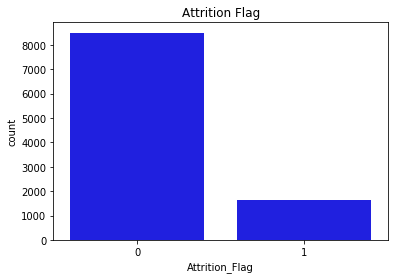

In [69]:
sns.countplot(df1["Attrition_Flag"],color='blue').set(title = "Attrition Flag")
plt.show()

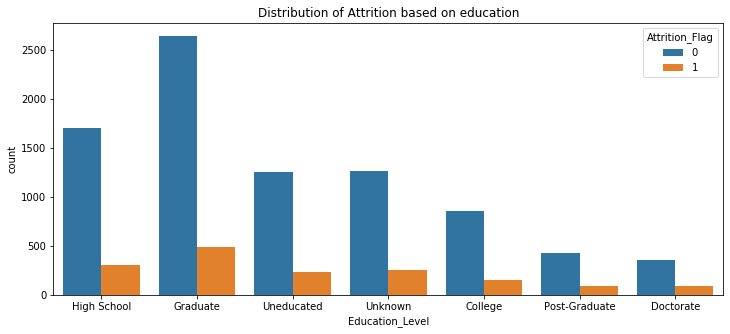

In [70]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x = 'Education_Level', data= df1,hue = 'Attrition_Flag')
plt.title('Distribution of Attrition based on education')
plt.show()

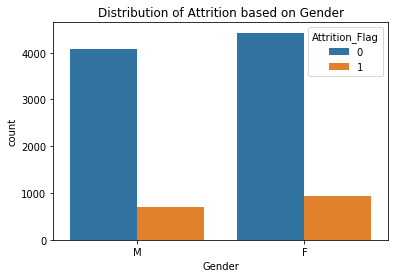

In [101]:
sns.countplot(x = 'Gender', data= df1,hue='Attrition_Flag')
plt.title('Distribution of Attrition based on Gender')
plt.show()

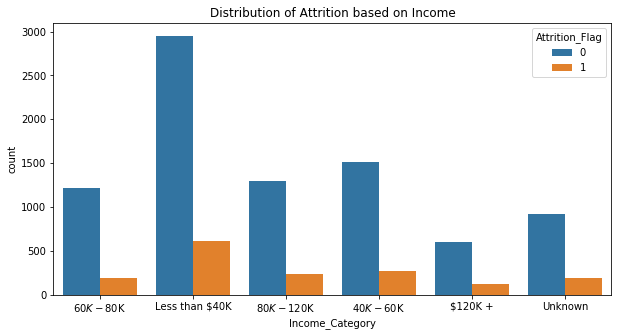

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Income_Category',data=df1, hue = 'Attrition_Flag')
plt.title('Distribution of Attrition based on Income')
plt.show()

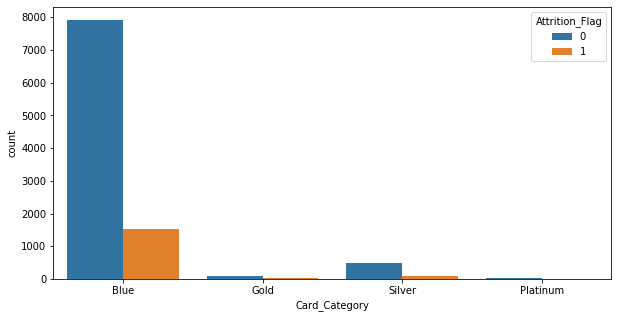

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Card_Category', data = df1,hue='Attrition_Flag')
plt.title('Distribution of Attrition based on Card_Category')
plt.show()

In [74]:
#df1.duplicated().sum()

0

## Checking Outliers by box plot

In [75]:
def outliers_IQR(xx):
    quart_1, quart_3 = np.percentile(xx, [25, 75])
    IQR_value = quart_3 - quart_1
    lower_bound = quart_1 - (IQR_value * 1.5)
    upper_bound = quart_3 + (IQR_value * 1.5)
    sns.boxplot(x = xx.index, data=xx)

In [76]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Count
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2661,1171,20
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28


(33.0, 65.0)

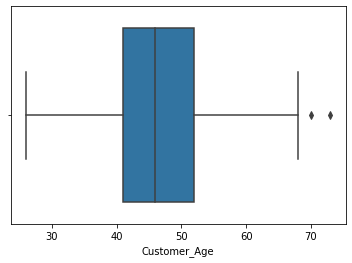

In [77]:
outliers_IQR(df1['Customer_Age'])
min_thresold, max_thresold = df1.Customer_Age.quantile([0.05,0.99])
min_thresold, max_thresold

(0.0, 5.0)

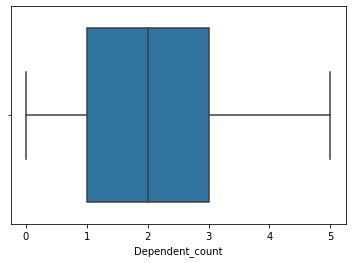

In [78]:
outliers_IQR(df1['Dependent_count'])
min_thresold, max_thresold = df1.Dependent_count.quantile([0.05,0.99])
min_thresold, max_thresold

(22.0, 56.0)

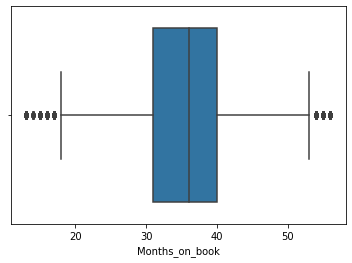

In [79]:
outliers_IQR(df1['Months_on_book'])
min_thresold, max_thresold = df1.Months_on_book.quantile([0.05,0.99])
min_thresold, max_thresold

(1.0, 6.0)

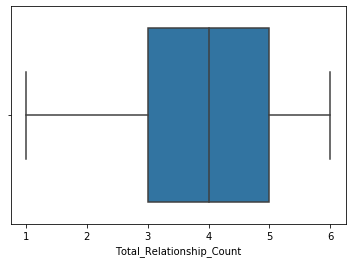

In [80]:
outliers_IQR(df1['Total_Relationship_Count'])
min_thresold, max_thresold = df1.Total_Relationship_Count.quantile([0.05,0.99])
min_thresold, max_thresold

(1.0, 6.0)

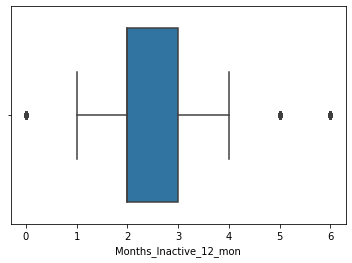

In [81]:
outliers_IQR(df1['Months_Inactive_12_mon'])
min_thresold, max_thresold = df1.Months_Inactive_12_mon.quantile([0.05,0.99])
min_thresold, max_thresold

(1.0, 5.0)

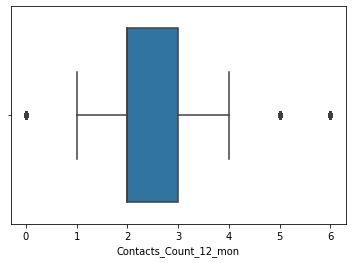

In [82]:
outliers_IQR(df1['Contacts_Count_12_mon'])
min_thresold, max_thresold = df1.Contacts_Count_12_mon.quantile([0.05,0.99])
min_thresold, max_thresold

(1438.3, 60372.119999999915)

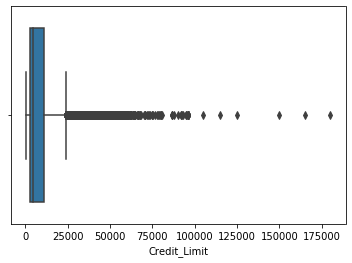

In [83]:
outliers_IQR(df1['Credit_Limit'])
min_thresold, max_thresold = df1.Credit_Limit.quantile([0.05,0.99])
min_thresold, max_thresold

(0.0, 3071.4799999999996)

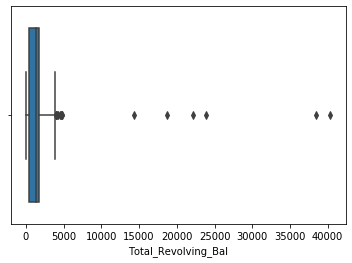

In [84]:
outliers_IQR(df1['Total_Revolving_Bal'])
min_thresold, max_thresold = df1.Total_Revolving_Bal.quantile([0.05,0.99])
min_thresold, max_thresold

(1283.3, 15882.359999999997)

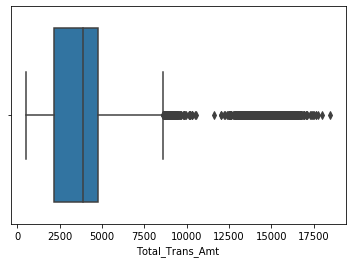

In [85]:
outliers_IQR(df1['Total_Trans_Amt'])
min_thresold, max_thresold = df1.Total_Trans_Amt.quantile([0.05,0.99])
min_thresold, max_thresold

(28.0, 123.0)

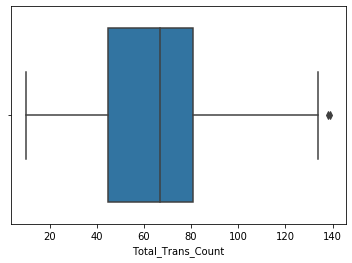

In [86]:
outliers_IQR(df1['Total_Trans_Count'])
min_thresold, max_thresold = df1.Total_Trans_Count.quantile([0.05,0.99])
min_thresold, max_thresold

# Filling outliers

In [87]:
def filling_outliers(yy):
    minm = yy.quantile(0.05)
    maxm = yy.quantile(0.99)
    yy.fillna(maxm)
    yy.fillna(minm)

In [88]:
filling_outliers(df1.Months_on_book)
filling_outliers(df1.Months_Inactive_12_mon)
filling_outliers(df1.Contacts_Count_12_mon)
filling_outliers(df1.Credit_Limit)
filling_outliers(df1.Total_Trans_Amt)
filling_outliers(df1.Total_Trans_Count)

In [89]:
df1.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Count
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2661,1171,20
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28
5,713061558,0,44.0,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1088,24
6,810347208,0,51.0,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,90148.0,2264,1330,31
7,818906208,0,32.0,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,1538,36
8,710930508,0,37.0,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2708,1350,24
9,719661558,0,48.0,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,1441,32


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_VIF (data):
    VIF = pd.DataFrame()
    VIF['features'] = data.columns
    VIF['VIF_value'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (VIF)

In [91]:
New_data = df1[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Count']]
New_data.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Count
0,45.0,3,39,5,1,3,12691.0,777,1144,42
1,49.0,5,44,6,1,2,8256.0,864,1291,33
2,51.0,3,36,4,1,0,3418.0,0,1887,20
3,40.0,4,34,3,4,1,3313.0,2661,1171,20
4,40.0,3,21,5,1,0,4716.0,0,816,28


In [92]:
Calculate_VIF(New_data)

,features,VIF_value
0,Customer_Age,72.132489
1,Dependent_count,4.008909
2,Months_on_book,56.382889
3,Total_Relationship_Count,7.047072
4,Months_Inactive_12_mon,6.038505
5,Contacts_Count_12_mon,5.454027
6,Credit_Limit,1.652150
7,Total_Revolving_Bal,2.211366
8,Total_Trans_Amt,8.452193
9,Total_Trans_Count,22.014775


In [93]:
New_data = New_data.drop(['Months_on_book','Customer_Age','Total_Trans_Count'], axis =1)
New_data.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,3,5,1,3,12691.0,777,1144
1,5,6,1,2,8256.0,864,1291
2,3,4,1,0,3418.0,0,1887
3,4,3,4,1,3313.0,2661,1171
4,3,5,1,0,4716.0,0,816


In [94]:
Calculate_VIF(New_data)

,features,VIF_value
0,Dependent_count,3.723368
1,Total_Relationship_Count,5.249152
2,Months_Inactive_12_mon,5.081825
3,Contacts_Count_12_mon,4.865856
4,Credit_Limit,1.635849
5,Total_Revolving_Bal,2.145092
6,Total_Trans_Amt,2.504721


In [95]:
df2 = df1[['Attrition_Flag','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt']]
df2.head()

,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,0,3,5,1,3,12691.0,777,1144
1,0,5,6,1,2,8256.0,864,1291
2,0,3,4,1,0,3418.0,0,1887
3,0,4,3,4,1,3313.0,2661,1171
4,0,3,5,1,0,4716.0,0,816


In [96]:
x = df2.drop(['Attrition_Flag'], axis =1)
y = df2['Attrition_Flag']


# Logistic Regression

In [97]:
from  sklearn.linear_model import LogisticRegression

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [99]:

model_LR = LogisticRegression(max_iter=100, random_state=0)
model_LR.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
prediction = model_LR.predict(X_test)
print(classification_report(Y_test,prediction))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1699
           1       0.83      0.28      0.42       327

    accuracy                           0.87      2026
   macro avg       0.85      0.64      0.67      2026
weighted avg       0.87      0.87      0.85      2026

